<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 실습 목표

- 데이터를 집계할 수 있습니다.
- 데이터프레임을 연결할 수 있습니다.
- 데이터프레임을 조인할 수 있습니다.
- Rolling, Shift 기능을 활용할 수 있습니다.

# P6. [실습] 데이터프레임 변경 - 3

## [실습1] 데이터프레임 연결

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# graduate 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(file_path, sep = ',') 

1) groupby() 메소드를 사용해 rank 별 gre, gpa 최댓값을 집계해서 df_max 데이터프레임을 만드세요.

- 단, as_index=False 옵션을 지정하세요.

In [3]:
# 집계
df_max = graduate.groupby('rank', as_index=False)[['gre','gpa']].max()

# 확인
df_max.head()

,rank,gre,gpa
0,1,800,4.0
1,2,800,4.0
2,3,800,4.0
3,4,800,4.0


2) rename() 메소드를 사용해 df_max 데이터프레임의 gre, gpa 열 이름을 각각 gre_max, gpa_max로 변경하세요.

In [4]:
# 열 이름 변경
df_max.rename(columns={'gre':'gre_max', 'gpa':'gpa_max'}, inplace=True)

# 확인
df_max.head()

,rank,gre_max,gpa_max
0,1,800,4.0
1,2,800,4.0
2,3,800,4.0
3,4,800,4.0


3) rank 별 gre, gpa 최솟값을 집계해서 df_min 데이터프레임을 만드세요.

- 단, as_index=False 옵션을 지정하세요.

In [5]:
# 집계
df_min = graduate.groupby('rank', as_index=False)[['gre','gpa']].min()

# 확인
df_min.head()

,rank,gre,gpa
0,1,340,2.42
1,2,300,2.42
2,3,220,2.56
3,4,300,2.26


4) df_min 데이터프레임의 gre, gpa 열 이름을 각각 gre_min, gpa_min로 변경하세요.

In [6]:
# 열 이름 변경
df_min.rename(columns = {'gre':'gre_min', 'gpa':'gpa_min'},inplace=True)

# 확인
df_min.head()

,rank,gre_min,gpa_min
0,1,340,2.42
1,2,300,2.42
2,3,220,2.56
3,4,300,2.26


5) concat() 함수를 사용해 df_max, df_min 데이터프레임을 연결한 결과를 갖는 df_graduate1 데이터프레임을 만드세요.

- 단, rank 열 중복을 없애기 위해 df_min 데이터프레임에서는 gre_min, gpa_min 열만 연결되게 하세요.

In [7]:
# 데이터프레임 연결
df_graduate1 = pd.concat([df_max, df_min[['gre_min', 'gpa_min']]], axis=1)

#확인
df_graduate1.head()

,rank,gre_max,gpa_max,gre_min,gpa_min
0,1,800,4.0,340,2.42
1,2,800,4.0,300,2.42
2,3,800,4.0,220,2.56
3,4,800,4.0,300,2.26


## [실습2] 데이터프레임 조인 #1

In [8]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [9]:
# graduate 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(file_path, sep = ',') 

6) groupby() 메소드를 사용해 rank 별 gre, gpa 평균을 집계해서 df_mean 데이터프레임을 만드세요.

- 단, as_index=False 옵션을 지정하세요.

In [10]:
# 집계
df_mean = graduate.groupby('rank', as_index=False)[['gre','gpa']].mean()

# 확인
df_mean.head()

,rank,gre,gpa
0,1,611.803279,3.453115
1,2,596.026490,3.361656
2,3,574.876033,3.432893
3,4,570.149254,3.318358


7) rename() 메소드를 사용해 df_mean 데이터프레임의 gre, gpa 열 이름을 각각 gre_mean, gpa_mean로 변경하세요.

In [11]:
# 열 이름 변경
df_mean.rename(columns={'gre':'gre_mean', 'gpa':'gpa_mean'}, inplace=True)

# 확인
df_mean.head()

,rank,gre_mean,gpa_mean
0,1,611.803279,3.453115
1,2,596.026490,3.361656
2,3,574.876033,3.432893
3,4,570.149254,3.318358


8) rank 별 gre, gpa 합계를 집계해서 df_sum 데이터프레임을 만드세요.

- 단, as_index=False 옵션을 지정하세요.

In [12]:
# 집계
df_sum = graduate.groupby('rank', as_index=False)[['gre','gpa']].sum()

# 확인
df_sum.head()

,rank,gre,gpa
0,1,37320,210.64
1,2,90000,507.61
2,3,69560,415.38
3,4,38200,222.33


9) df_sum 데이터프레임의 gre, gpa 열 이름을 각각 gre_sum, gpa_sum로 변경하세요.

In [13]:
# 열 이름 변경
df_sum.rename(columns = {'gre':'gre_sum', 'gpa':'gpa_sum'},inplace=True)

# 확인
df_sum.head()

,rank,gre_sum,gpa_sum
0,1,37320,210.64
1,2,90000,507.61
2,3,69560,415.38
3,4,38200,222.33


10) merge() 함수를 사용해 df_mean, df_sum 데이터프레임을 조인한 결과를 갖는 df_graduate2 데이터프레임을 만드세요.

- 단, 양쪽 데이터프레임의 rank 열을 기준으로 inner join 하세요.

In [14]:
# 데이터프레임 조인
df_graduate2 = pd.merge(df_mean, df_sum, on='rank', how='inner')

# 확인
df_graduate2.head()

,rank,gre_mean,gpa_mean,gre_sum,gpa_sum
0,1,611.803279,3.453115,37320,210.64
1,2,596.026490,3.361656,90000,507.61
2,3,574.876033,3.432893,69560,415.38
3,4,570.149254,3.318358,38200,222.33


## [실습3] 데이터프레임 조인 #2

In [15]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [16]:
# titanic 데이터 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path, sep = ',') 

11) 다음 세 가지 데이터프레임을 만드세요.

- 탑승지역 + 남녀별 평균 나이를 갖는 데이터프레임 df_mean
- 탑승지역 + 남녀별 최대 나이를 갖는 데이터프레임 df_max
- 탑승지역 + 남녀별 최소 나이를 갖는 데이터프레임 df_min
- 단, as_index=False 옵션을 지정하세요.

In [17]:
# df_mean 데이터프레임 만들기
df_mean = titanic.groupby(['Embarked', 'Sex'], as_index=False)['Age'].mean()

# 확인
df_mean.head()

,Embarked,Sex,Age
0,Cherbourg,female,28.344262
1,Cherbourg,male,32.998841
2,Queenstown,female,24.291667
3,Queenstown,male,30.937500
4,Southhampton,female,27.771505


In [18]:
# df_max 데이터프레임 만들기
df_max = titanic.groupby(['Embarked', 'Sex'], as_index=False)['Age'].max()

# 확인
df_max.head()

,Embarked,Sex,Age
0,Cherbourg,female,60.0
1,Cherbourg,male,71.0
2,Queenstown,female,39.0
3,Queenstown,male,70.5
4,Southhampton,female,63.0


In [19]:
# df_min 데이터프레임 만들기
df_min = titanic.groupby(['Embarked', 'Sex'], as_index=False)['Age'].min()

# 확인
df_min.head()

,Embarked,Sex,Age
0,Cherbourg,female,0.75
1,Cherbourg,male,0.42
2,Queenstown,female,15.00
3,Queenstown,male,2.00
4,Southhampton,female,1.00


12) df_mean, df_max, df_min 데이터프레임의 Age 열 이름을 각각 age_mean, age_max, age_min으로 바꾸세요.

In [20]:
# df_mean 데이터프레임 열 이름 변경: Age --> Age_mean
df_mean.rename(columns={'Age':'Age_mean'}, inplace=True)

# 확인
df_mean.head()

,Embarked,Sex,Age_mean
0,Cherbourg,female,28.344262
1,Cherbourg,male,32.998841
2,Queenstown,female,24.291667
3,Queenstown,male,30.937500
4,Southhampton,female,27.771505


In [21]:
# df_max 데이터프레임 열 이름 변경: Age --> Age_max
df_max.rename(columns={'Age':'Age_max'}, inplace=True)

# 확인
df_max.head()

,Embarked,Sex,Age_max
0,Cherbourg,female,60.0
1,Cherbourg,male,71.0
2,Queenstown,female,39.0
3,Queenstown,male,70.5
4,Southhampton,female,63.0


In [22]:
# df_min 데이터프레임 열 이름 변경: Age --> Age_min
df_min.rename(columns={'Age':'Age_min'}, inplace=True)

# 확인
df_min.head()

,Embarked,Sex,Age_min
0,Cherbourg,female,0.75
1,Cherbourg,male,0.42
2,Queenstown,female,15.00
3,Queenstown,male,2.00
4,Southhampton,female,1.00


13) df_mean, df_max, df_min 데이터프레임을 조인해서 df_titanic 데이터프레임을 만드세요.

- 단, Embarked, Sex 열을 기준으로 inner join 하세요.

In [23]:
# 조인 #1
df_titanic = pd.merge(df_mean, df_max, on=['Embarked', 'Sex'], how='inner')

# 조인 #2
df_titanic = pd.merge(df_titanic, df_min, on=['Embarked', 'Sex'], how='inner')

# 확인
df_titanic.head()

,Embarked,Sex,Age_mean,Age_max,Age_min
0,Cherbourg,female,28.344262,60.0,0.75
1,Cherbourg,male,32.998841,71.0,0.42
2,Queenstown,female,24.291667,39.0,15.00
3,Queenstown,male,30.937500,70.5,2.00
4,Southhampton,female,27.771505,63.0,1.00


## [실습4] 데이터프레임 롤링 시프트


In [24]:
# 라이브러리와 파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [25]:
# 파일 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/stock.csv'
stock = pd.read_csv(file_path, sep = ',') 
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645


14) stock 데이터프레임에서 Adj Close 열을 제거하세요.

In [26]:
# Adj Close 열 제거
stock.drop('Adj Close', axis=1, inplace=True)

# 확인
stock.head()

,Date,High,Low,Open,Close,Volume
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600


15) rolling() 메소드를 사용해 기준일 포함 최근 3일 최대 주가를 갖는 Close_lag3_1 열을 추가하세요.

In [27]:
# 3일 이동 최대 주가
stock['Close_lag3_1'] = stock['Close'].rolling(3).max()

# 확인
stock.head(10)

,Date,High,Low,Open,Close,Volume,Close_lag3_1
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,NaN
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,NaN
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.997768
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,3.714286
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.714286
5,2000-01-10,3.651786,3.383929,3.642857,3.491071,126266000,3.553571
6,2000-01-11,3.549107,3.232143,3.426339,3.312500,110387200,3.553571
7,2000-01-12,3.410714,3.089286,3.392857,3.113839,244017200,3.491071
8,2000-01-13,3.526786,3.303571,3.374442,3.455357,258171200,3.455357
9,2000-01-14,3.651786,3.549107,3.571429,3.587054,97594000,3.587054


16) rolling(), shift() 메소드를 사용해 기준일을 포함하지 않은 최근 3일의 최대 주가를 갖는 Close_lag3_2 열을 추가하세요.

In [28]:
# 과거 3일의 최대 주가
stock['Close_lag3_2'] = stock['Close'].rolling(3).max().shift(1)

# 확인
stock.head(10)

,Date,High,Low,Open,Close,Volume,Close_lag3_1,Close_lag3_2
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,NaN,NaN
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,NaN,NaN
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.997768,NaN
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,3.714286,3.997768
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.714286,3.714286
5,2000-01-10,3.651786,3.383929,3.642857,3.491071,126266000,3.553571,3.714286
6,2000-01-11,3.549107,3.232143,3.426339,3.312500,110387200,3.553571,3.553571
7,2000-01-12,3.410714,3.089286,3.392857,3.113839,244017200,3.491071,3.553571
8,2000-01-13,3.526786,3.303571,3.374442,3.455357,258171200,3.455357,3.491071
9,2000-01-14,3.651786,3.549107,3.571429,3.587054,97594000,3.587054,3.455357


17) 기준일을 포함하지 않은 최근 7일 평균 거래량을 갖는 Volume_lag7 열을 추가하세요.

In [29]:
# 과거 7일 평균 거래량
stock['Volume_lag7'] = stock['Volume'].rolling(7).mean().shift(1)

# 확인
stock.head(10)

,Date,High,Low,Open,Close,Volume,Close_lag3_1,Close_lag3_2,Volume_lag7
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,NaN,NaN,NaN
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,NaN,NaN,NaN
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.997768,NaN,NaN
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,3.714286,3.997768,NaN
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.714286,3.714286,NaN
5,2000-01-10,3.651786,3.383929,3.642857,3.491071,126266000,3.553571,3.714286,NaN
6,2000-01-11,3.549107,3.232143,3.426339,3.312500,110387200,3.553571,3.553571,NaN
7,2000-01-12,3.410714,3.089286,3.392857,3.113839,244017200,3.491071,3.553571,142922000.0
8,2000-01-13,3.526786,3.303571,3.374442,3.455357,258171200,3.455357,3.491071,158646000.0
9,2000-01-14,3.651786,3.549107,3.571429,3.587054,97594000,3.587054,3.455357,177228400.0


18) stock 데이터프레임에서 2019년 1월 ~ 6월 데이터만 가져와 stock2019 데이터프레임을 만드세요.

- 단, copy() 메소드를 사용해 완전히 복사하세요.

In [30]:
# 2019년 1월 ~ 6월 데이터 복사
stock2019 = stock[stock['Date'].between('2019-01-01', '2019-06-31')].copy()

# 확인
stock2019.head()

,Date,High,Low,Open,Close,Volume,Close_lag3_1,Close_lag3_2,Volume_lag7
4779,2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700,157.919998,157.740005,5.524019e+07
4780,2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200,157.919998,157.919998,5.127829e+07
4781,2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100,157.919998,157.919998,5.064509e+07
4782,2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800,148.259995,157.919998,5.370764e+07
4783,2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300,150.750000,148.259995,5.316411e+07


19) stock2019 데이터프레임의 인덱스를 초기화 하세요.

In [31]:
# 인덱스 초기화
stock2019.reset_index(drop=True, inplace=True)

# 확인
stock2019.head()

,Date,High,Low,Open,Close,Volume,Close_lag3_1,Close_lag3_2,Volume_lag7
0,2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700,157.919998,157.740005,5.524019e+07
1,2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200,157.919998,157.919998,5.127829e+07
2,2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100,157.919998,157.919998,5.064509e+07
3,2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800,148.259995,157.919998,5.370764e+07
4,2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300,150.750000,148.259995,5.316411e+07


20) 아래 구문을 실행해 시각화된 결과를 확인하세요.

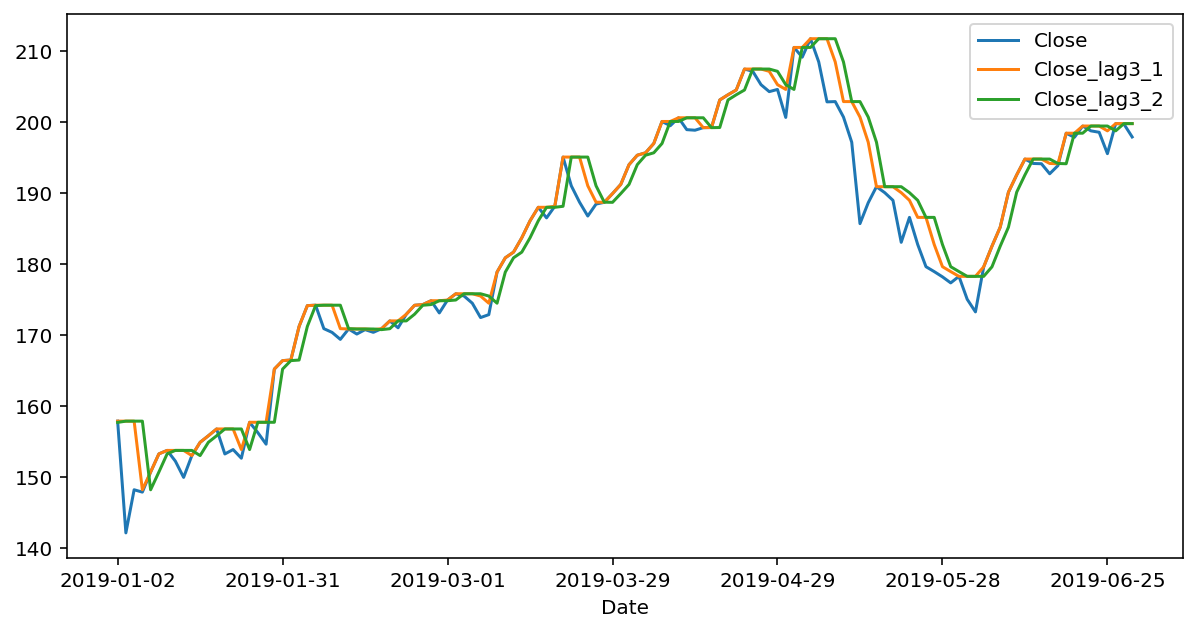

In [32]:
stock2019.plot(x='Date', y=['Close', 'Close_lag3_1', 'Close_lag3_2'], figsize=(10, 5))
plt.show()

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>